# How can we use machine learning in Python to automatically detect fraudulent online payment transactions based on features like transaction type, amount, and account balances? 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\sudents and projects\S8\Classification\PS_20174392719_1491204439457_log 2.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

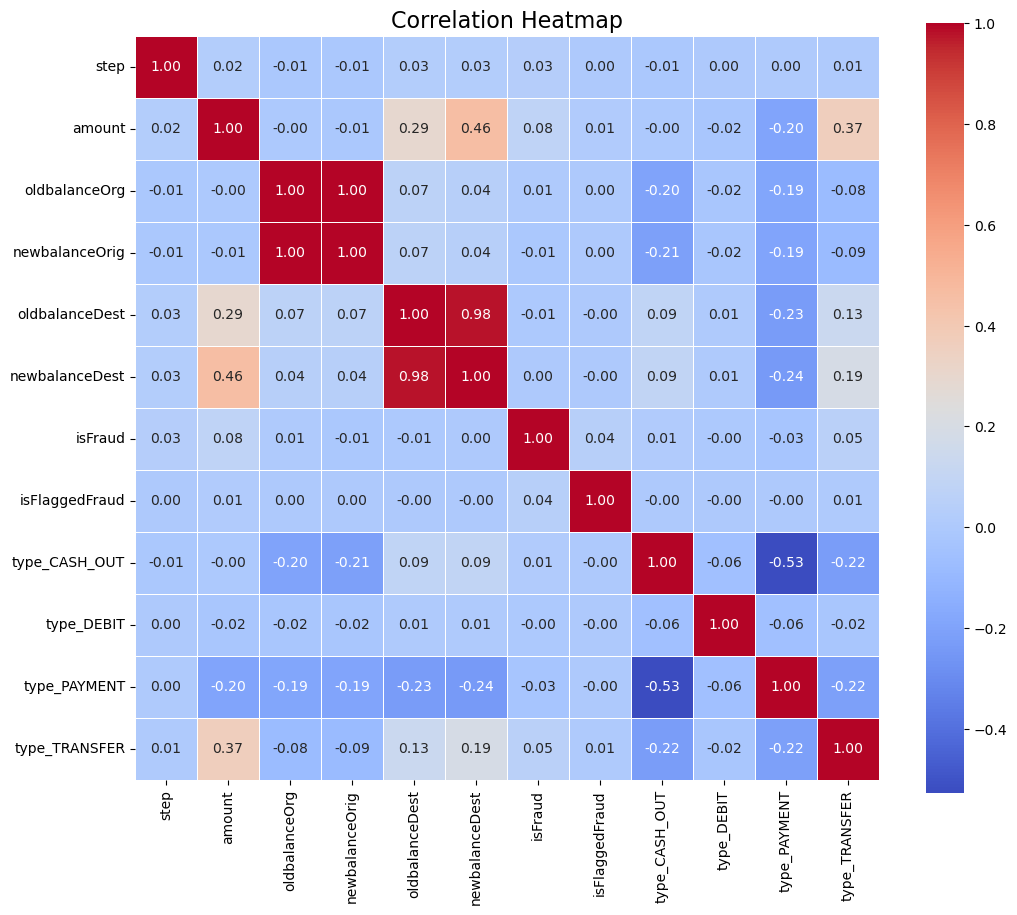

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual path or variable if already loaded)
# data = pd.read_csv("your_file.csv")

# Drop non-numeric columns (or encode them beforehand if needed)
data_cleaned = data.drop(['nameOrig', 'nameDest'], axis=1)

# If 'type' is still categorical, convert it using one-hot encoding
data_cleaned = pd.get_dummies(data_cleaned, columns=['type'], drop_first=True)

# Compute the correlation matrix
correlation_matrix = data_cleaned.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [15]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)
X=data.drop('isFraud',axis=1)
y=data['isFraud']

In [17]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,0


In [19]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (5090096, 8)
Shape of test dataset :  (1272524, 8)


In [25]:
#LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9992746698687018
[[1270823      81]
 [    842     778]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.48      0.63      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.74      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9994499121431109
[[1270711     193]
 [    507    1113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.85      0.69      0.76      1620

    accuracy                           1.00   1272524
   macro avg       0.93      0.84      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



In [31]:
# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9930146700573035
Confusion Matrix:
 [[1263381    7523]
 [   1366     254]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.03      0.16      0.05      1620

    accuracy                           0.99   1272524
   macro avg       0.52      0.58      0.53   1272524
weighted avg       1.00      0.99      1.00   1272524



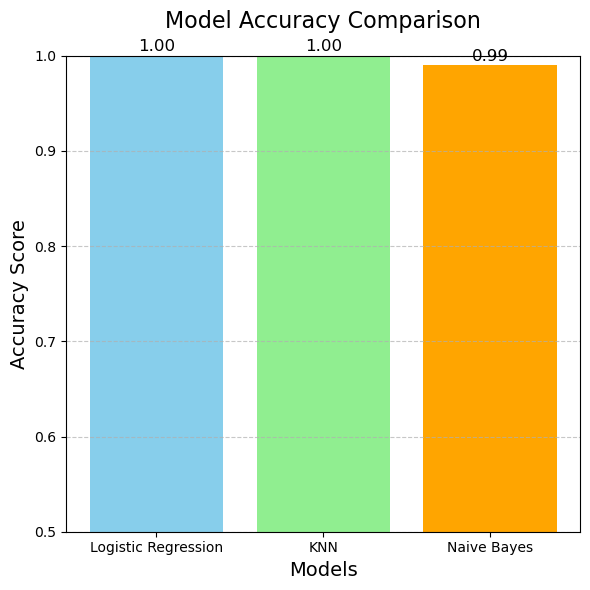

In [35]:
import matplotlib.pyplot as plt

# Accuracy scores
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes']
accuracy_scores = [1.00, 1.00, 0.99]
colors = ['skyblue', 'lightgreen', 'orange']

plt.figure(figsize=(6, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', fontsize=12)

# 🔧 Add space between title and plot
plt.title('Model Accuracy Comparison', fontsize=16, pad=20)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()